Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


/var/folders/71/693d7y0d06g9308xcs30vxwm0000gn/T/ipykernel_94869/869460788.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


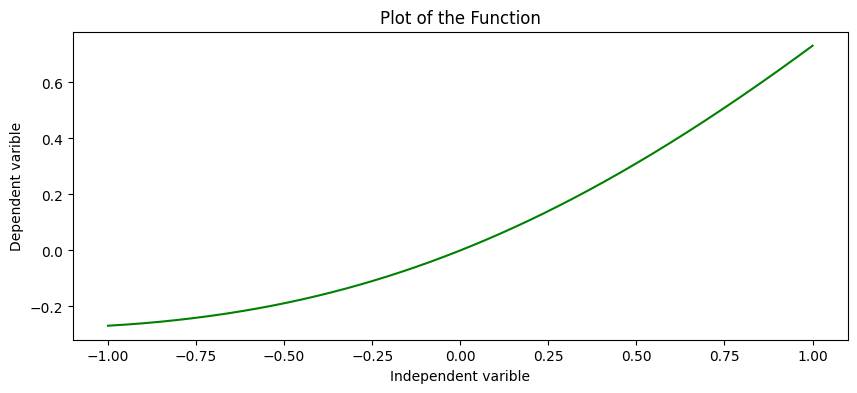

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math
import gc

# First Function stimulation

torch.manual_seed(1) 
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = x*(1/(1+torch.exp(-x)))
print('Xshape:',x.shape,"\n Yshape:",y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "green")
plt.title('Plot of the Function')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('fun1.png')
plt.show()

n_samples, n_features = x.shape

In [3]:
def training(model,x,y):
    model.train()
    max_epoch = 24000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0

    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_function(prediction, y)
        optimise.zero_grad()   
        loss.backward()         
        optimise.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush= True) 
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergeance reached for loss:{loss_arr[-1]:.4f} at epoch: {epoch}")
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [4]:
def parameters(m,i):
  a=[]
  for i in m.parameters():
    a.append(torch.numel(i))
  print('Total no of parameters :'+str(i), np.sum(a),)
def model_weight(m,flag,i):
   if flag:
    print("\nModel "+str(i)+" weight and bias before training\n")
   else:print("\nModel "+str(i)+" weight and bias after training\n")
   for param in m.state_dict():
      print(param, "\t",m.state_dict()[param])

In [5]:
class Model_1(torch.nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.fc1 = torch.nn.Linear(1, 5)
        self.fc2 = torch.nn.Linear(5, 10)
        self.fc3 = torch.nn.Linear(10, 10)
        self.fc4 = torch.nn.Linear(10, 10)
        self.fc5 = torch.nn.Linear(10, 10)
        self.fc6 = torch.nn.Linear(10, 10)
        self.fc7 = torch.nn.Linear(10, 5)
        self.predict = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x))
        x = torch.nn.functional.leaky_relu(self.fc2(x))
        x = torch.nn.functional.leaky_relu(self.fc3(x))
        x = torch.nn.functional.leaky_relu(self.fc4(x))
        x = torch.nn.functional.leaky_relu(self.fc5(x))
        x = torch.nn.functional.leaky_relu(self.fc6(x))
        x = torch.nn.functional.leaky_relu(self.fc7(x))
        x = self.predict(x)
        return x

m1 = Model_1()
optimise = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_function = torch.nn.MSELoss()

Total no of parameters :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 weight and bias before training

fc1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
fc1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
fc2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
fc2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.3174])
fc3.weight 	 te

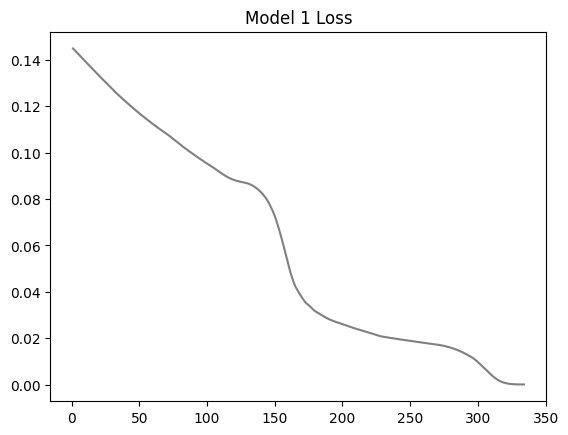

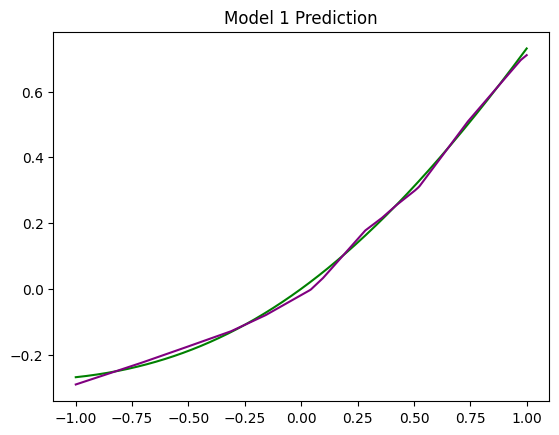

In [6]:
parameters(m1,1)
model_weight(m1,1,1)
Model_1epoch_arr,Model_1loss_arr,Model_1prediction = training(m1,x,y)
model_weight(m1,0,1)
plt.plot(Model_1epoch_arr,Model_1loss_arr,color="grey")
plt.title('Model 1 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="green")
plt.plot(x,Model_1prediction.data.numpy(),color="purple")
plt.title('Model 1 Prediction')
plt.show()


In [7]:
class Model_2(torch.nn.Module):
    def __init__(self,):
        super(Model_2, self).__init__()
        self.fc1 = torch.nn.Linear(1, 10)   
        self.fc2 = torch.nn.Linear (10, 18)
        self.fc3 = torch.nn.Linear (18, 15)
        self.fc4 = torch.nn.Linear (15, 4)
        self.predict = torch.nn.Linear(4, 1)  
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))   
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = F.leaky_relu(self.fc4(x))
        x = self.predict(x)                    
        return x

m2 = Model_2()    
optimise = torch.optim.Adam(m2.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_function = torch.nn.MSELoss()

Total no of parameters :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 weight and bias before training

fc1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
fc1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
fc2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985,
         -0.1913, -

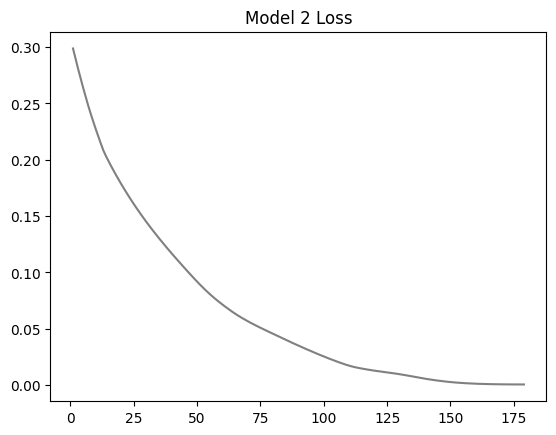

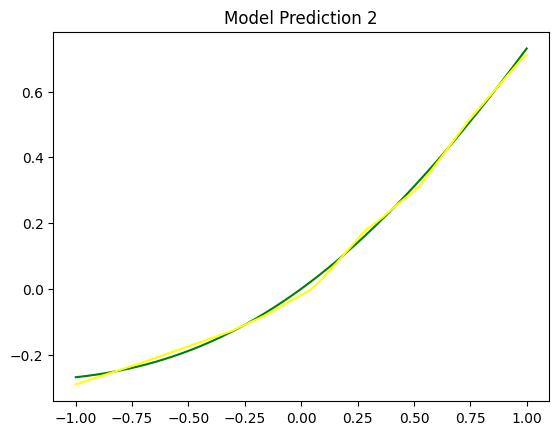

10929

In [8]:
parameters(m2,3)
model_weight(m2,1,3)
Model_2epoch_arr,Model_2loss_arr,Model_2prediction = training(m2,x,y)
model_weight(m2,0,3)
#plot
plt.plot(Model_2epoch_arr,Model_2loss_arr,color="grey")
plt.title('Model 2 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="green")
plt.plot(x,Model_1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 2')
plt.show()
torch.cuda.empty_cache()
gc.collect()

In [9]:
class Model_3(torch.nn.Module):
    def __init__(self,):
        super(Model_3, self).__init__()
        self.fc1 = torch.nn.Linear(1, 190)  
        self.predict = torch.nn.Linear(190, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = self.predict(x)
        return x

m3 = Model_3()
optimise = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_function = torch.nn.MSELoss() 

Total no of parameters :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 weight and bias before training

fc1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [ 0.4883],
   

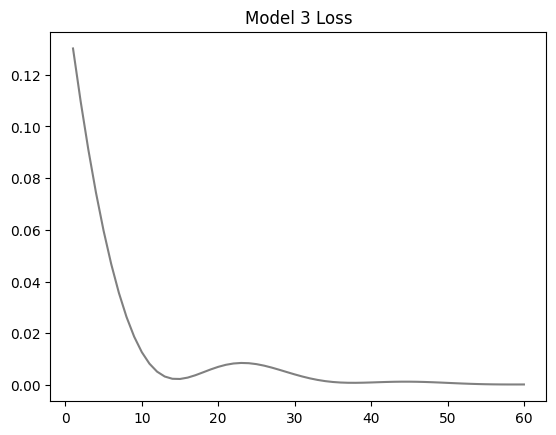

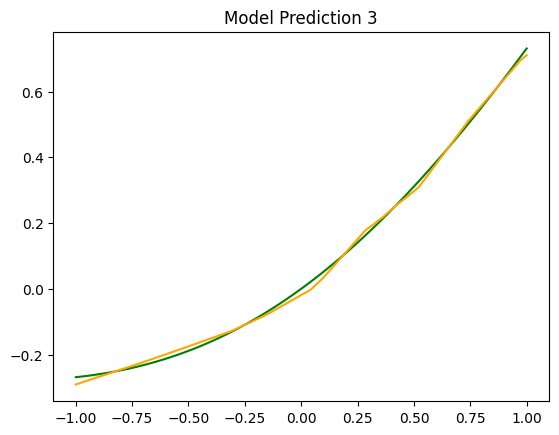

In [10]:
parameters(m3,1)
model_weight(m3,1,3)
Model_3epoch_arr,Model_3loss_arr,Model_3prediction = training(m3,x,y)
model_weight(m3,0,3)
#plot
plt.plot(Model_3epoch_arr,Model_3loss_arr,color="grey")
plt.title('Model 3 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="green")
plt.plot(x,Model_1prediction.data.numpy(),color="orange")
plt.title('Model Prediction 3')
plt.show()

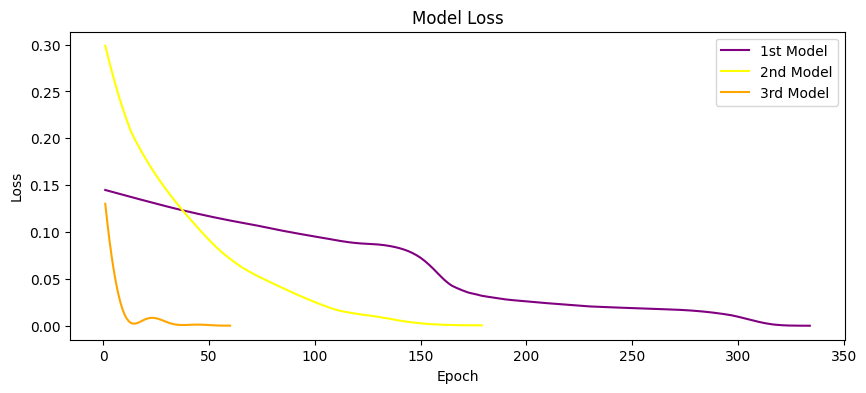

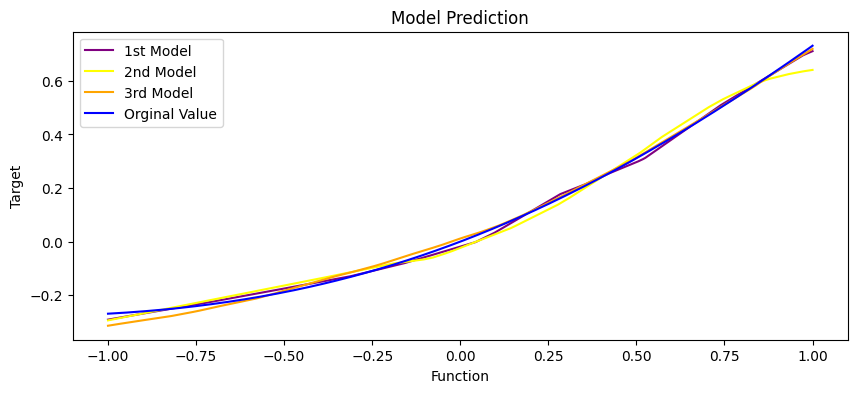

In [11]:
plt.figure(figsize=(10,4))
plt.plot(Model_1epoch_arr,Model_1loss_arr, color = "purple")
plt.plot(Model_2epoch_arr,Model_2loss_arr, color = "yellow")
plt.plot(Model_3epoch_arr,Model_3loss_arr, color = "orange")
plt.title('Model Loss')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss1.pdf')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x,Model_1prediction.data.numpy(),color="purple")
plt.plot(x,Model_2prediction.data.numpy(),color="yellow")
plt.plot(x,Model_3prediction.data.numpy(),color="orange")
plt.plot(x,y.numpy(),color="blue")
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction1.pdf')
plt.show()

/var/folders/71/693d7y0d06g9308xcs30vxwm0000gn/T/ipykernel_94869/637264413.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


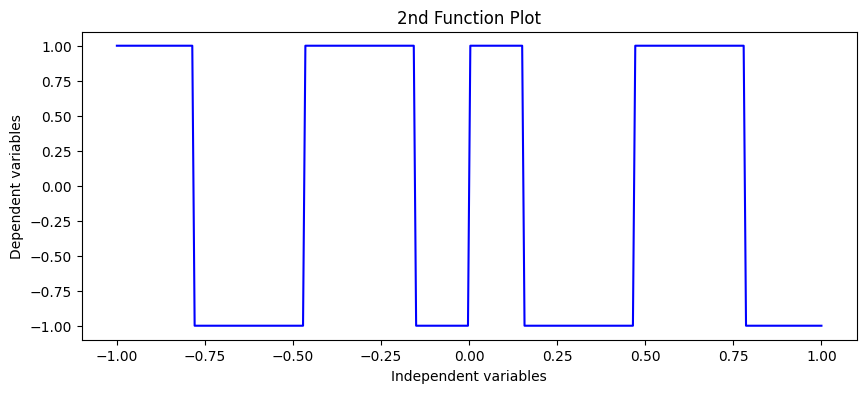

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = np.sign(np.cos(10* x)/x)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x, y, color='blue')
plt.title('2nd Function Plot')
plt.xlabel('Independent variables')
plt.ylabel('Dependent variables')
plt.savefig('fuction2.png')

plt.show()

n_samples, n_features = x.shape

Total no of parameters :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 weight and bias before training

fc1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
fc1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
fc2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
fc2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.3174])
fc3.weight 	 te

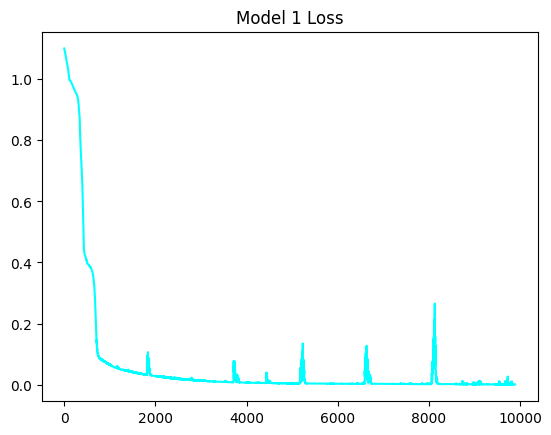

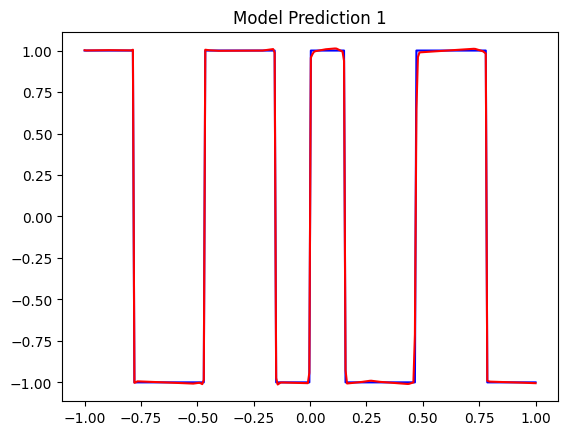

In [13]:
m1 = Model_1() # define the network and move to GPU
optimise = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_function = torch.nn.MSELoss()
parameters(m1,1)
model_weight(m1,1,1)
Model_1epoch_arr,Model_1loss_arr,Model_1prediction = training(m1,x,y)
model_weight(m1,0,1)
plt.plot(Model_1epoch_arr,Model_1loss_arr,color="cyan")
plt.title('Model 1 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="blue")
plt.plot(x,Model_1prediction.data.numpy(),color="red")
plt.title('Model Prediction 1')
plt.show()


Total no of parameters :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 weight and bias before training

fc1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
fc1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
fc2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985,
         -0.1913, -

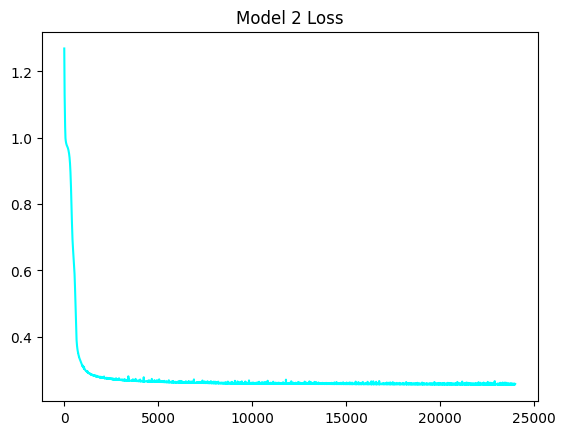

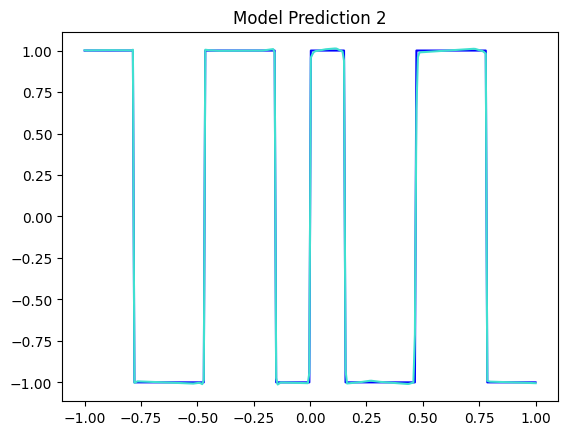

In [14]:
m2 = Model_2()    # define the network
#optimise = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimise = torch.optim.Adam(m2.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_function = torch.nn.MSELoss()
parameters(m2,3)
model_weight(m2,1,3)
Model_2epoch_arr,Model_2loss_arr,Model_2prediction = training(m2,x,y)
model_weight(m2,0,3)
#plot
plt.plot(Model_2epoch_arr,Model_2loss_arr,color="cyan")
plt.title('Model 2 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="blue")
plt.plot(x,Model_1prediction.data.numpy(),color="turquoise")
plt.title('Model Prediction 2')
plt.show()


Total no of parameters :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 weight and bias before training

fc1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [ 0.4883],
   

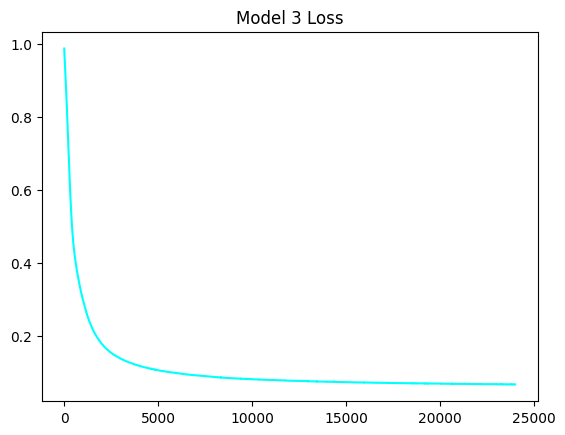

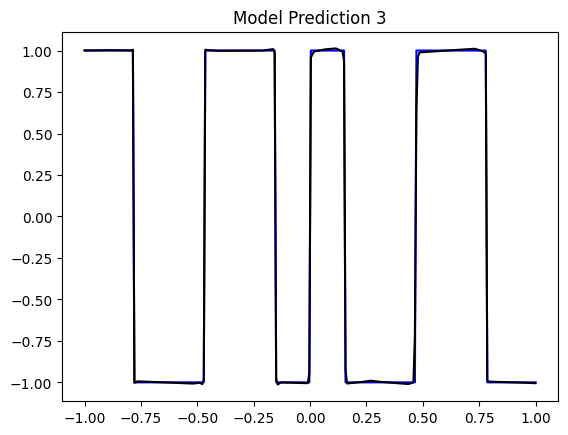

In [15]:
m3 = Model_3()     # define the network
optimise = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_function = torch.nn.MSELoss() # this is for regression mean squared loss
parameters(m3,1)
model_weight(m3,1,3)
Model_3epoch_arr,Model_3loss_arr,Model_3prediction = training(m3,x,y)
model_weight(m3,0,3)
#plot
plt.plot(Model_3epoch_arr,Model_3loss_arr,color="cyan")
plt.title('Model 3 Loss')
plt.show()
#plot
plt.plot(x.numpy(),y.numpy(),color="blue")
plt.plot(x,Model_1prediction.data.numpy(),color="black")
plt.title('Model Prediction 3')
plt.show()

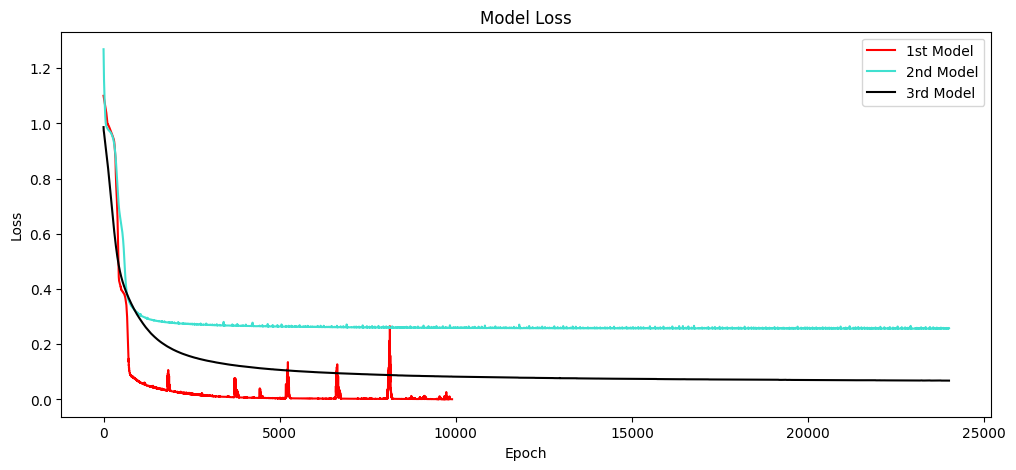

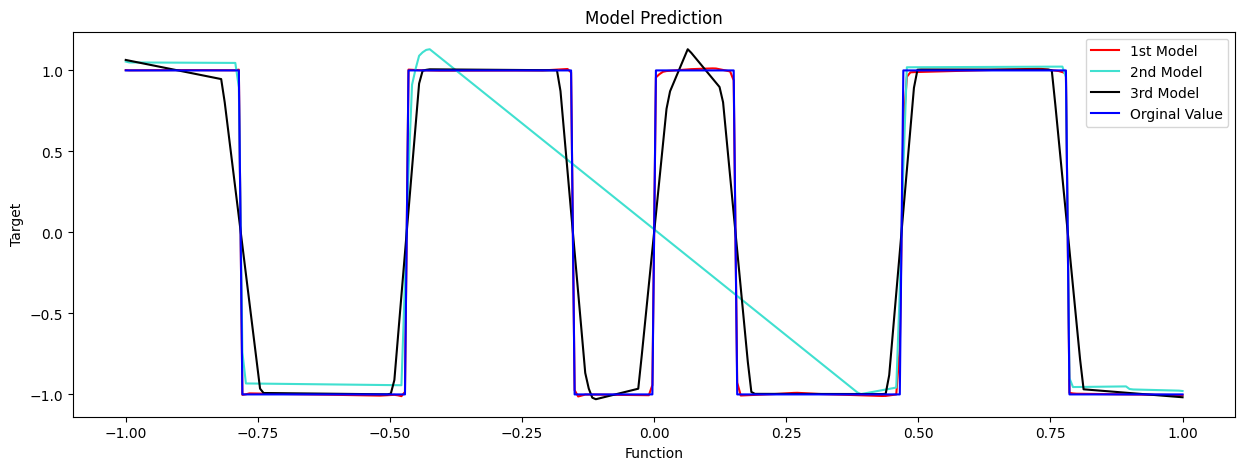

In [16]:
plt.figure(figsize=(12,5))
plt.plot(Model_1epoch_arr,Model_1loss_arr, color = "red")
plt.plot(Model_2epoch_arr,Model_2loss_arr, color = "turquoise")
plt.plot(Model_3epoch_arr,Model_3loss_arr, color = "black")
plt.title('Model Loss')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss2.pdf')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(x,Model_1prediction.data.numpy(),color="red")
plt.plot(x,Model_2prediction.data.numpy(),color="turquoise")
plt.plot(x,Model_3prediction.data.numpy(),color="black")
plt.plot(x,y.numpy(),color="blue")
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model','3rd Model','Orginal Value'],loc='best')
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('second_model_prediction.pdf')
plt.show()

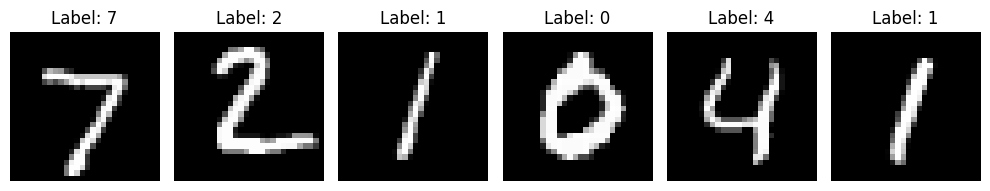

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set manual seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Data augmentation for MNIST
data_transforms = transforms.Compose([
    transforms.RandomRotation(10),  # Random rotation by 10 degrees
    transforms.ToTensor()
])

# Load and prepare MNIST dataset with transformations
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=data_transforms, download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# DataLoader for efficient batching
train_data_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=512, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=128, shuffle=False)

# Display a sample of test data with improved visualization
def plot_data_samples(data_loader, num_samples=6):
    test_data_iter = iter(data_loader)
    sample_images, sample_labels = next(test_data_iter)

    # Plot a grid of sample images
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 4))
    for i in range(num_samples):
        axes[i].imshow(sample_images[i][0], cmap='gray')
        axes[i].set_title(f"Label: {sample_labels[i].item()}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Plot some test data samples
plot_data_samples(test_data_loader)

In [37]:
def run_training(model, total_epochs, data_loader, loss_function, optimise):
    model.train()
    steps_per_epoch = len(data_loader)
    training_loss = []
    epoch_log = []
    accuracy_log = []
    training_in_progress = True
    current_epoch = 0
    avg_loss_per_epoch = []
    
    while training_in_progress:
        current_epoch += 1
        correct_count = 0
        total_count = 0
        total_loss = 0

        for batch_idx, (batch_inputs, batch_targets) in enumerate(data_loader):  
            # Forward pass
            outputs = model(batch_inputs)
            loss = loss_function(outputs, batch_targets)
            total_loss += loss.detach().numpy()
            
            # Backward pass and optimization
            optimise.zero_grad()
            loss.backward()
            optimise.step()

            # Calculate accuracy
            _, predicted_labels = torch.max(outputs.data, 1)
            total_count += batch_targets.size(0)
            correct_count += (predicted_labels == batch_targets).sum().item()
            batch_accuracy = 100.0 * correct_count / total_count

            if (batch_idx + 1) % 100 == 0:
                print(f'Epoch [{current_epoch}/{total_epochs}], Step [{batch_idx+1}/{steps_per_epoch}], Loss: {loss.item():.4f}', end='\r', flush=True)
                epoch_log.append(current_epoch)
                training_loss.append(loss.item())
                print(f'Epoch [{current_epoch}/{total_epochs}], Accuracy: {batch_accuracy:.2f} %', end='\r', flush=True)
                accuracy_log.append(batch_accuracy)

                if current_epoch == total_epochs:
                    print(f"Max Epoch Reached, Loss: {loss.item():.4f}, Accuracy: {batch_accuracy:.2f}%")
                    training_in_progress = False
                elif (current_epoch > 5) and (training_loss[-1] < 0.001):
                    if abs(training_loss[-3] - training_loss[-2]) < 1.0e-05 and abs(training_loss[-2] - training_loss[-1]) < 1.0e-05:
                        print("Convergence reached for loss:", training_loss[-1])
                        training_in_progress = False

        avg_loss_per_epoch.append(total_loss / (batch_idx + 1))
        
    return epoch_log, training_loss, accuracy_log, avg_loss_per_epoch


In [38]:
# Hyper-parameters 
input_dimensions = 784  # 28x28 image size
total_epochs = 15
learning_rate_value = 0.001
conv_kernel_size = 4
weight_decay_value = 1e-4
dropout_rate = 0.25

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layer_1 = nn.Conv2d(1, 10, conv_kernel_size)  # First Convolution
        self.max_pool = nn.MaxPool2d(2, 2)  # Pooling with kernel size 2, stride 2
        self.conv_layer_2 = nn.Conv2d(10, 20, conv_kernel_size)  # Second Convolution
        self.fc_layer_1 = nn.Linear(320, 50)  # Fully Connected layer after flattening
        self.dropout_layer = nn.Dropout(dropout_rate)
        self.fc_layer_2 = nn.Linear(50, 100)
        self.output_layer = nn.Linear(100, 10)

    def forward(self, input_tensor):
        # Input: n, 1, 28, 28 (assuming grayscale MNIST images)
        output = self.max_pool(F.relu(self.conv_layer_1(input_tensor)))  
        output = self.max_pool(F.relu(self.conv_layer_2(output)))  
        output = output.view(-1, 320)  # Flatten
        output = F.relu(self.fc_layer_1(output))  # First Fully Connected layer
        output = self.dropout_layer(output)  
        output = F.relu(self.fc_layer_2(output))  # Second Fully Connected layer
        output = self.output_layer(output)  # Output layer
        return output

Total number of parameters in Model 1: 25550
Max Epoch Reached, Loss: 0.0580, Accuracy: 97.64%


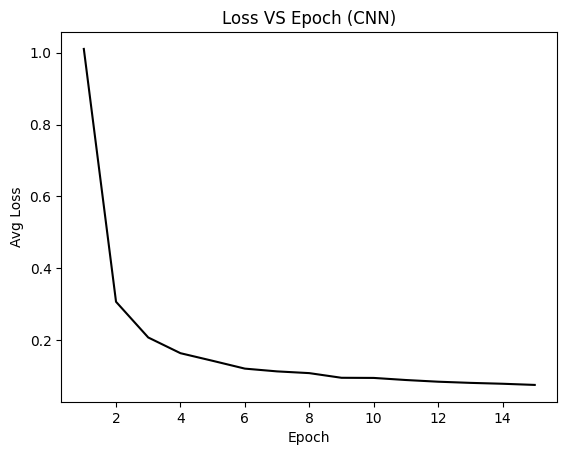

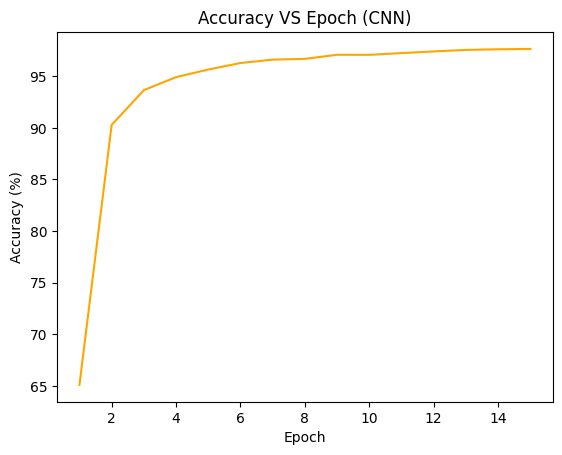

In [70]:
# Assuming you have the rest of your CNN2 model defined above...

# Define the testFunc to accept model and total_epochs
def testFunc(model, test_data_loader, total_epochs):
    model.eval()  # Set the model to evaluation mode
    epoch_log = []
    loss_log = []
    accuracy_log = []
    avg_loss_log = []

    # Loop for a fixed number of epochs for testing (simulating multiple test runs)
    for epoch in range(total_epochs):
        print(f"Testing epoch {epoch+1}/{total_epochs}")
        
        # Initialize variables to track loss and accuracy for this epoch
        epoch_loss = 0.0
        correct = 0
        total = 0

        # Turn off gradients for testing
        with torch.no_grad():
            for data, target in test_data_loader:  # Loop through the test dataset
                output = model(data)  # Forward pass
                loss = criterion(output, target)  # Compute loss (use a predefined loss function)
                epoch_loss += loss.item()  # Accumulate the loss

                _, predicted = torch.max(output, 1)  # Get the class with the highest probability
                total += target.size(0)
                correct += (predicted == target).sum().item()  # Count correct predictions

        # Compute the average loss and accuracy for this epoch
        avg_loss = epoch_loss / len(test_data_loader)
        accuracy = 100 * correct / total

        # Append values to the logs
        epoch_log.append(epoch)
        loss_log.append(epoch_loss)  # Total loss for this epoch
        accuracy_log.append(accuracy)  # Accuracy for this epoch
        avg_loss_log.append(avg_loss)  # Average loss for this epoch

    return epoch_log, loss_log, accuracy_log, avg_loss_log

torch.manual_seed(1)

# Instantiate the CNN model
cnn1 = SimpleCNN()

# Define loss function and optimise
loss_func = nn.CrossEntropyLoss()
optimise = torch.optim.Adam(cnn1.parameters(), lr=learning_rate_value, weight_decay=weight_decay_value)

# Calculate and print the total number of parameters in the model
a = [torch.numel(p) for p in cnn1.parameters()]
print('Total number of parameters in Model 1:', np.sum(a))

# Train the model using the run_training function
epoch_log, training_loss, accuracy_log, avg_loss_per_epoch = run_training(
    cnn1, 
    total_epochs, 
    train_data_loader, 
    loss_func, 
    optimise
)

# Plot Loss vs Epoch  
plt.plot(epoch_log, avg_loss_per_epoch, color="black")
plt.title('Loss VS Epoch (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Avg Loss')
plt.show()

# Plot Accuracy vs Epoch
plt.plot(epoch_log, accuracy_log, color="orange")
plt.title('Accuracy VS Epoch (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

Total number of parameters in Model 2: 25570
Training epoch 1/15
Training epoch 2/15
Training epoch 3/15
Training epoch 4/15
Training epoch 5/15
Training epoch 6/15
Training epoch 7/15
Training epoch 8/15
Training epoch 9/15
Training epoch 10/15
Training epoch 11/15
Training epoch 12/15
Training epoch 13/15
Training epoch 14/15
Training epoch 15/15


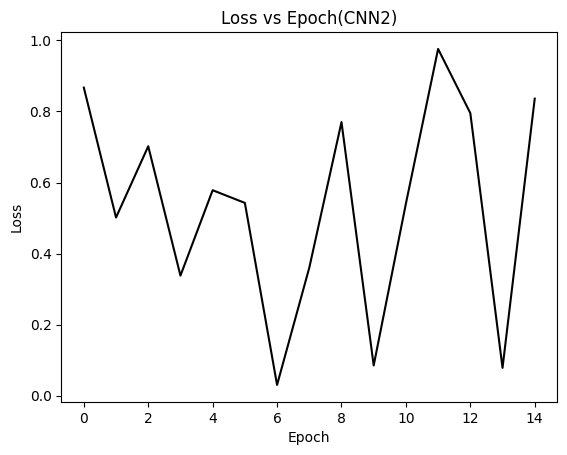

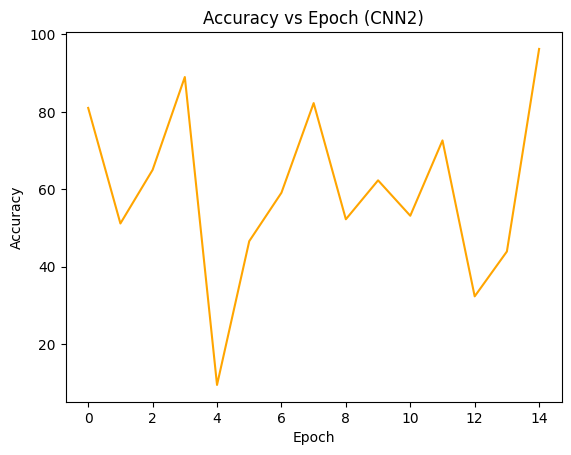

In [51]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, conv_kernel_size)  # 1st Convolution
        self.pool = nn.MaxPool2d(2, 2)  # Pooling layer (kernel size = 2, stride = 2)
        self.conv2 = nn.Conv2d(10, 20, conv_kernel_size)  # 2nd Convolution
        # Fully connected layers
        self.fc1 = nn.Linear(20 * conv_kernel_size * conv_kernel_size, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 40)
        self.fc4 = nn.Linear(40, 30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        # Convolutional layers with pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)  # Flatten the output
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)  # Output layer
        return x

# Set the random seed for reproducibility
torch.manual_seed(42)

# Initialize the CNN2 model
cnn2 = CNN2()

# Define the loss function and optimise
loss_func = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimise = torch.optim.Adam(cnn2.parameters(), lr=learning_rate_value, weight_decay=weight_decay_value)

# Print the total number of parameters in Model 2
params = []
for param in cnn2.parameters():
    params.append(torch.numel(param))
print('Total number of parameters in Model 2:', np.sum(params))

# Train the CNN2 model (assuming the trainFunc is defined similarly to before)
train_epoch2, train_losses2, train_acc2, train_avg_loss2 = testFunc(cnn2, total_epochs)

# Plot CNN2 Loss vs Epoch
plt.plot(train_epoch2, train_avg_loss2, color="black")
plt.title('Loss vs Epoch(CNN2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot CNN2 Accuracy vs Epoch
plt.plot(train_epoch2, train_acc2, color="orange")
plt.title('Accuracy vs Epoch (CNN2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




Total number of parameters in Model 3: 25621
Max Epoch Reached, Loss: 0.0451, Accuracy: 98.56%


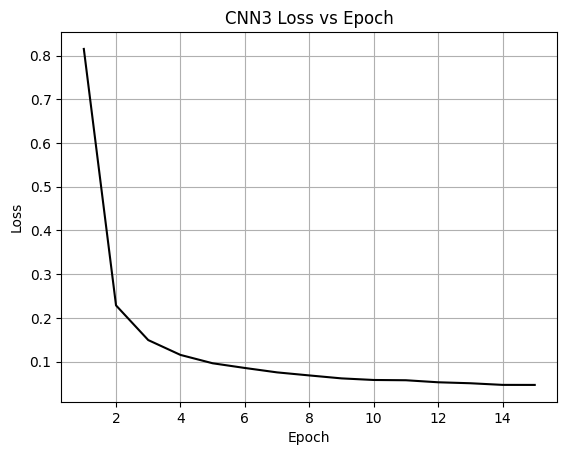

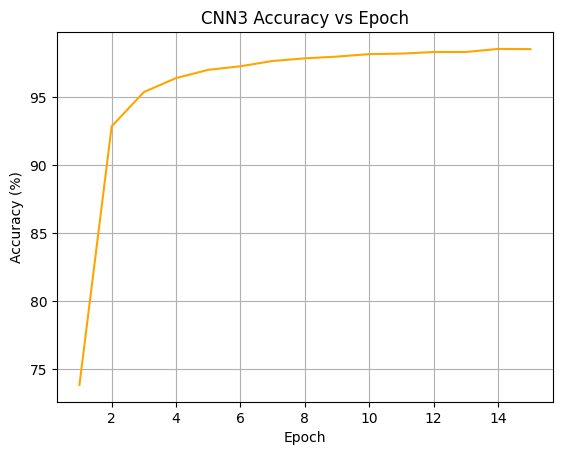

In [81]:
# CNN3 model definition
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)    # Pooling layer
        self.conv2 = nn.Conv2d(10, 15, 5) # Second convolutional layer
        self.fc1 = nn.Linear(15 * 4 * 4, 86)  # Fully connected layer 1
        self.fc2 = nn.Linear(86, 10)          # Fully connected layer 2 (Output)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 15 * 4 * 4)            # Flatten the output for the fully connected layer
        x = F.relu(self.fc1(x))               # Fully connected layer 1 + ReLU
        x = self.fc2(x)                       # Output layer
        return x

# Set the random seed for reproducibility
torch.manual_seed(1)

# Initialize the CNN3 model
cnn3 = CNN3()

# Define the loss function and optimise
loss_func = nn.CrossEntropyLoss()
optimise = torch.optim.Adam(cnn3.parameters(), lr=learning_rate_value, weight_decay=weight_decay_value)

# Calculate and print the total number of parameters in Model 3
params = [torch.numel(param) for param in cnn3.parameters()]
print('Total number of parameters in Model 3:', np.sum(params))

# Train the CNN3 model (assuming trainFunc is defined similarly to before)
train_epoch3, train_losses3, train_acc3, train_avg_loss3 = run_training(cnn3, total_epochs, train_data_loader, loss_func, optimise)
    
# Plot CNN3 Loss vs Epoch
plt.plot(train_epoch3, train_avg_loss3, color="black")
plt.title('CNN3 Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot CNN3 Accuracy vs Epoch
plt.plot(train_epoch3, train_acc3, color="orange")
plt.title('CNN3 Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()




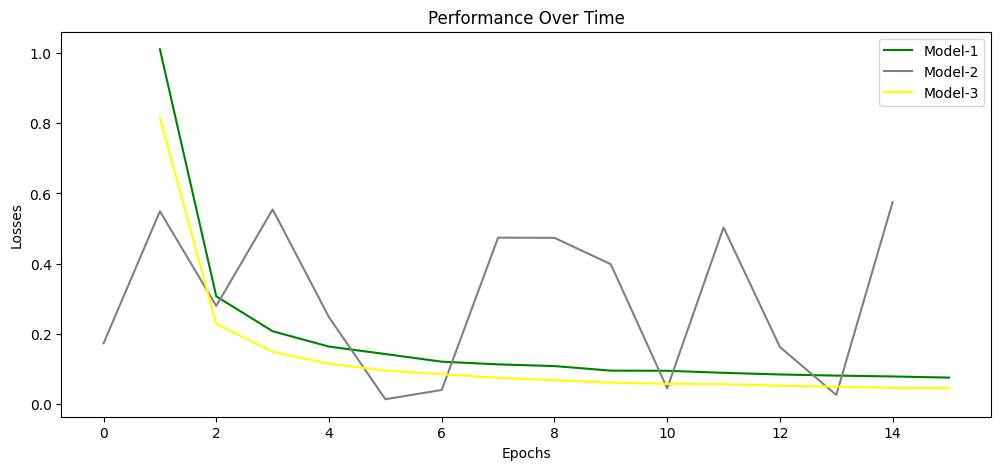

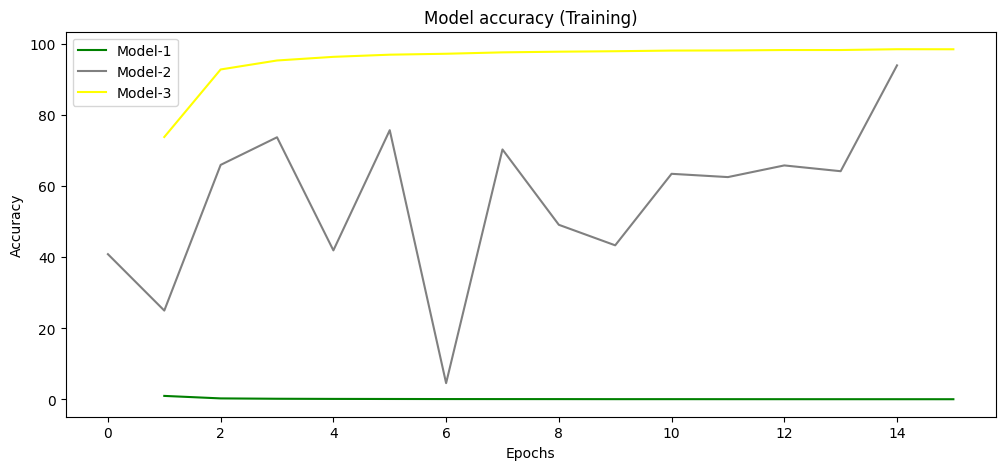

In [85]:
plt.figure(figsize=(12, 5))

plt.plot(epoch_log, avg_loss_per_epoch, color="green")
plt.plot(train_epoch2, train_avg_loss2, color="grey")
plt.plot(train_epoch3, train_avg_loss3, color="yellow")
plt.title('Performance Over Time')
plt.legend(['Model-1', 'Model-2', 'Model-3'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.savefig('epochloss.jpg')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epoch_log, avg_loss_per_epoch, color="green")
plt.plot(train_epoch2, train_acc2, color="grey")
plt.plot(train_epoch3, train_acc3, color="yellow")
plt.title('Model accuracy (Training)')
plt.legend(['Model-1', 'Model-2', 'Model-3'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('modaccuracytrain.jpg')
plt.show()
